In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#data reading
df = pd.read_csv('LungcancerDs.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [2]:
#Drop ID
df.drop(['Patient Id'],axis = 1,inplace=True)
#Attributes and target
X = df.drop('Level',axis='columns')
Y = df.Level
df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Encode the non-numeric values
df['Level'].replace(['Low', 'Medium', 'High'],['0','1', '2'],inplace=True)


df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [4]:
missing_values=df.isnull().sum()
print(missing_values)

index                       0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [5]:
df.duplicated().sum()

0

In [9]:
#DATA VISUALISATION

In [10]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_16100\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,...,0.049401,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677


C:\Users\HP\AppData\Local\Temp\ipykernel_16100\1944610908.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_16100\1944610908.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_16100\19446

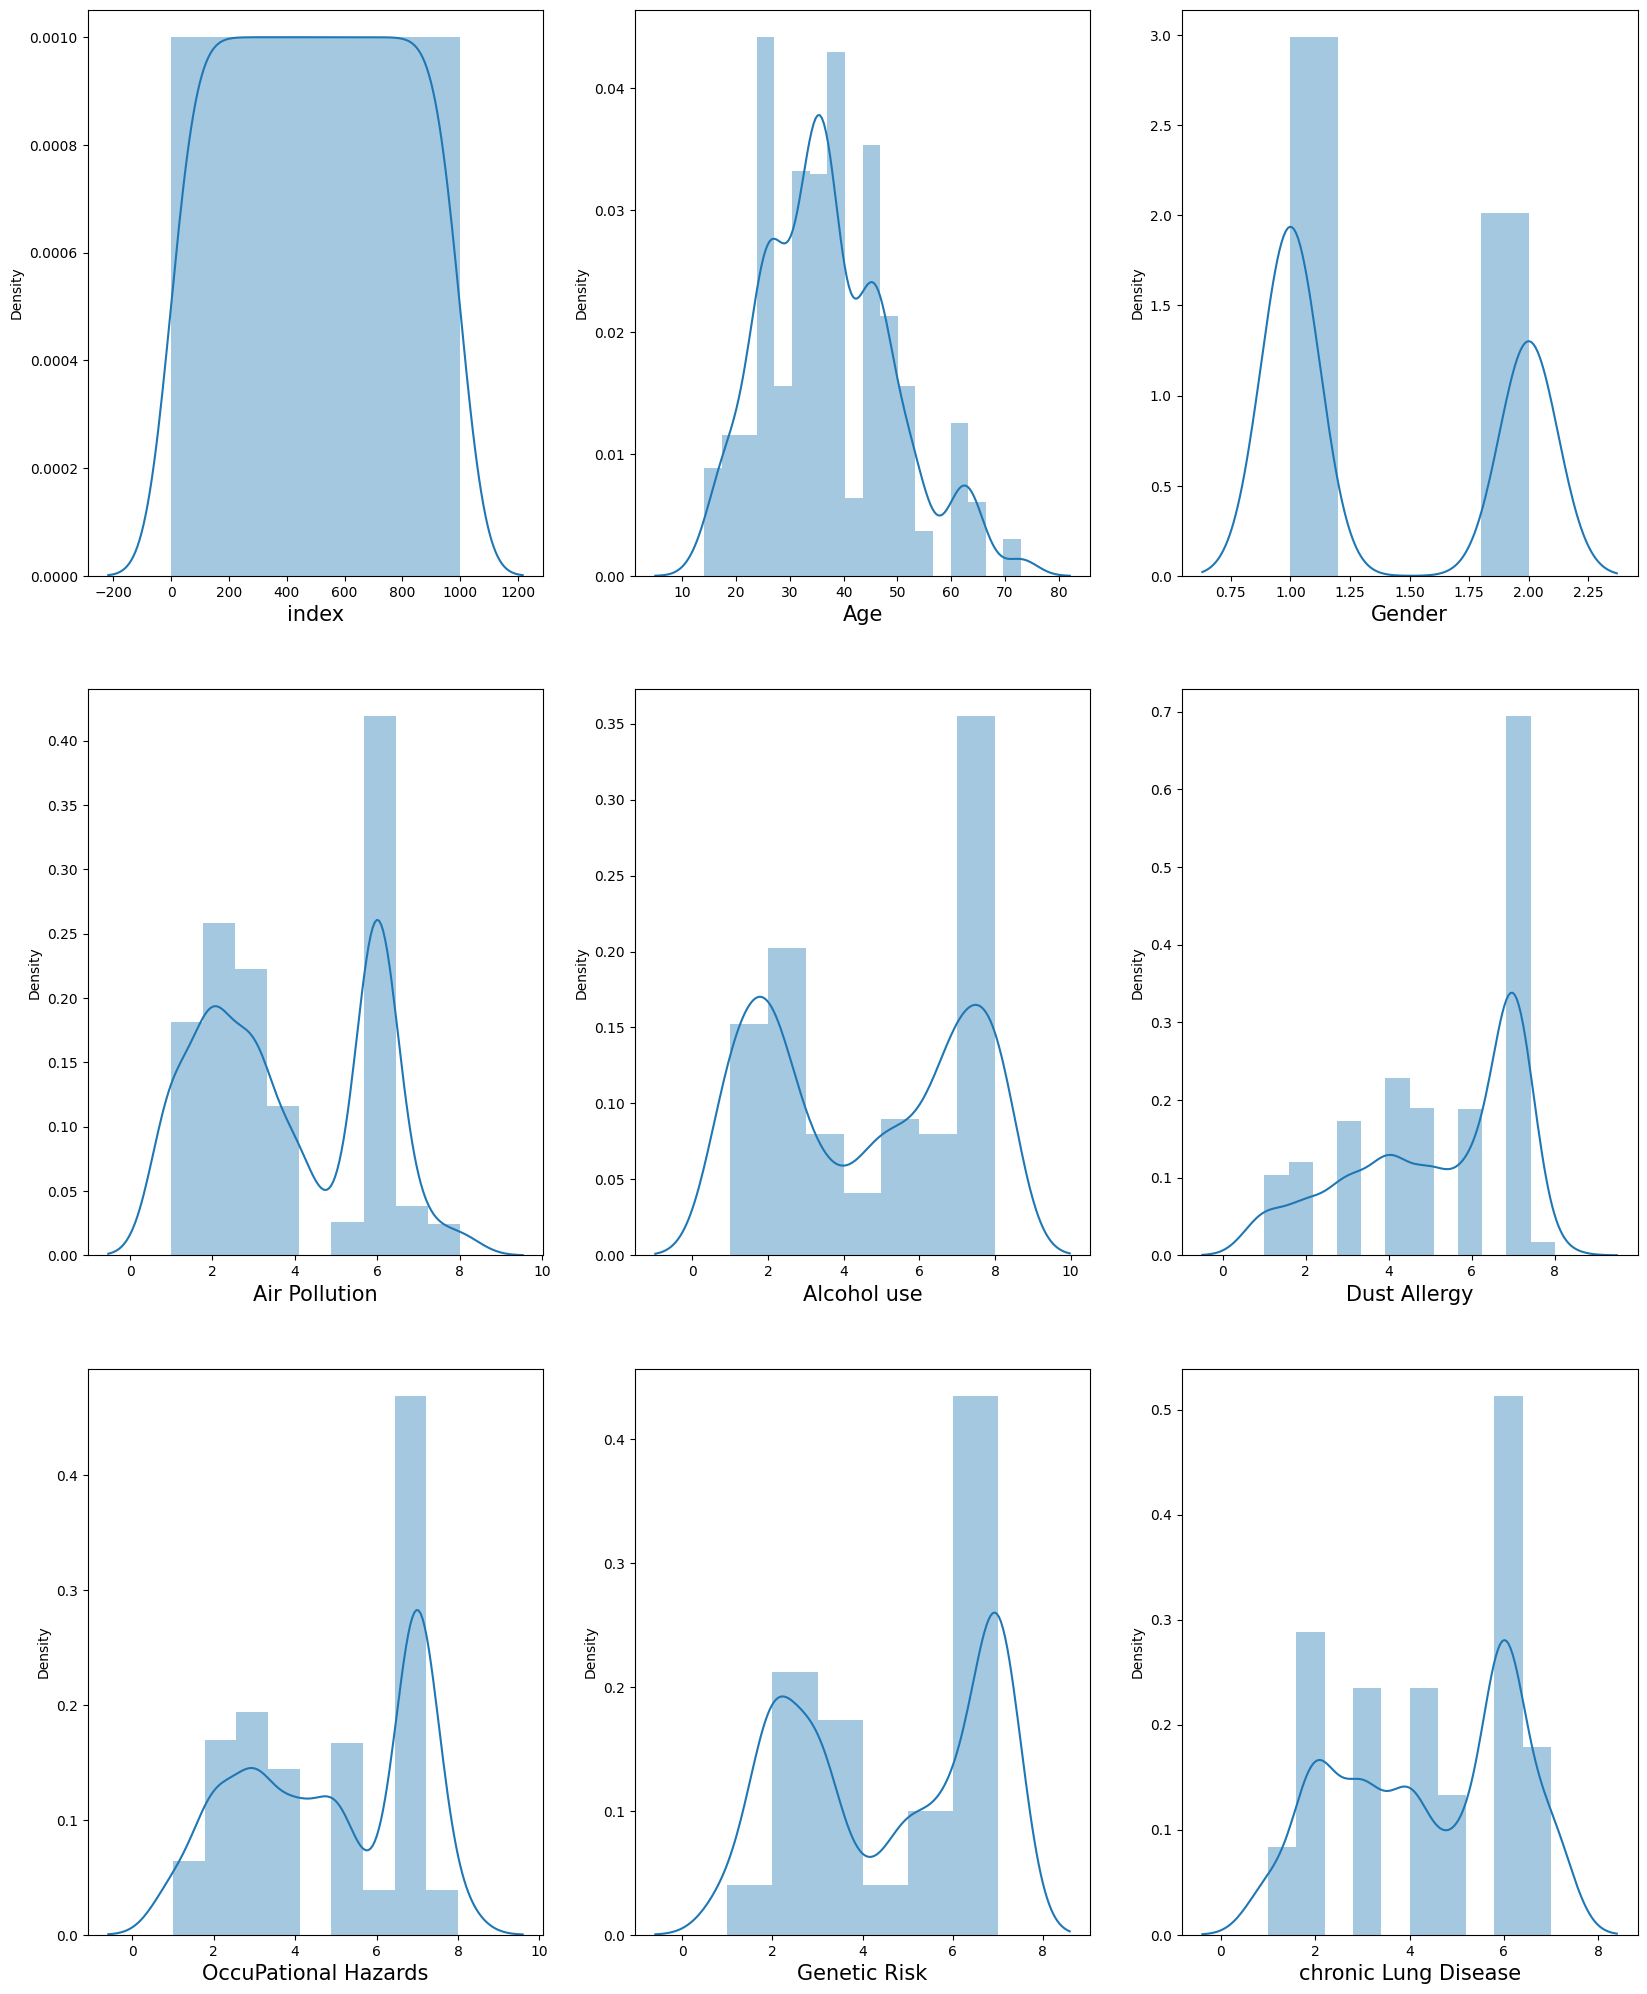

In [12]:
#Data distribution per attribute
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16100\2395164378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


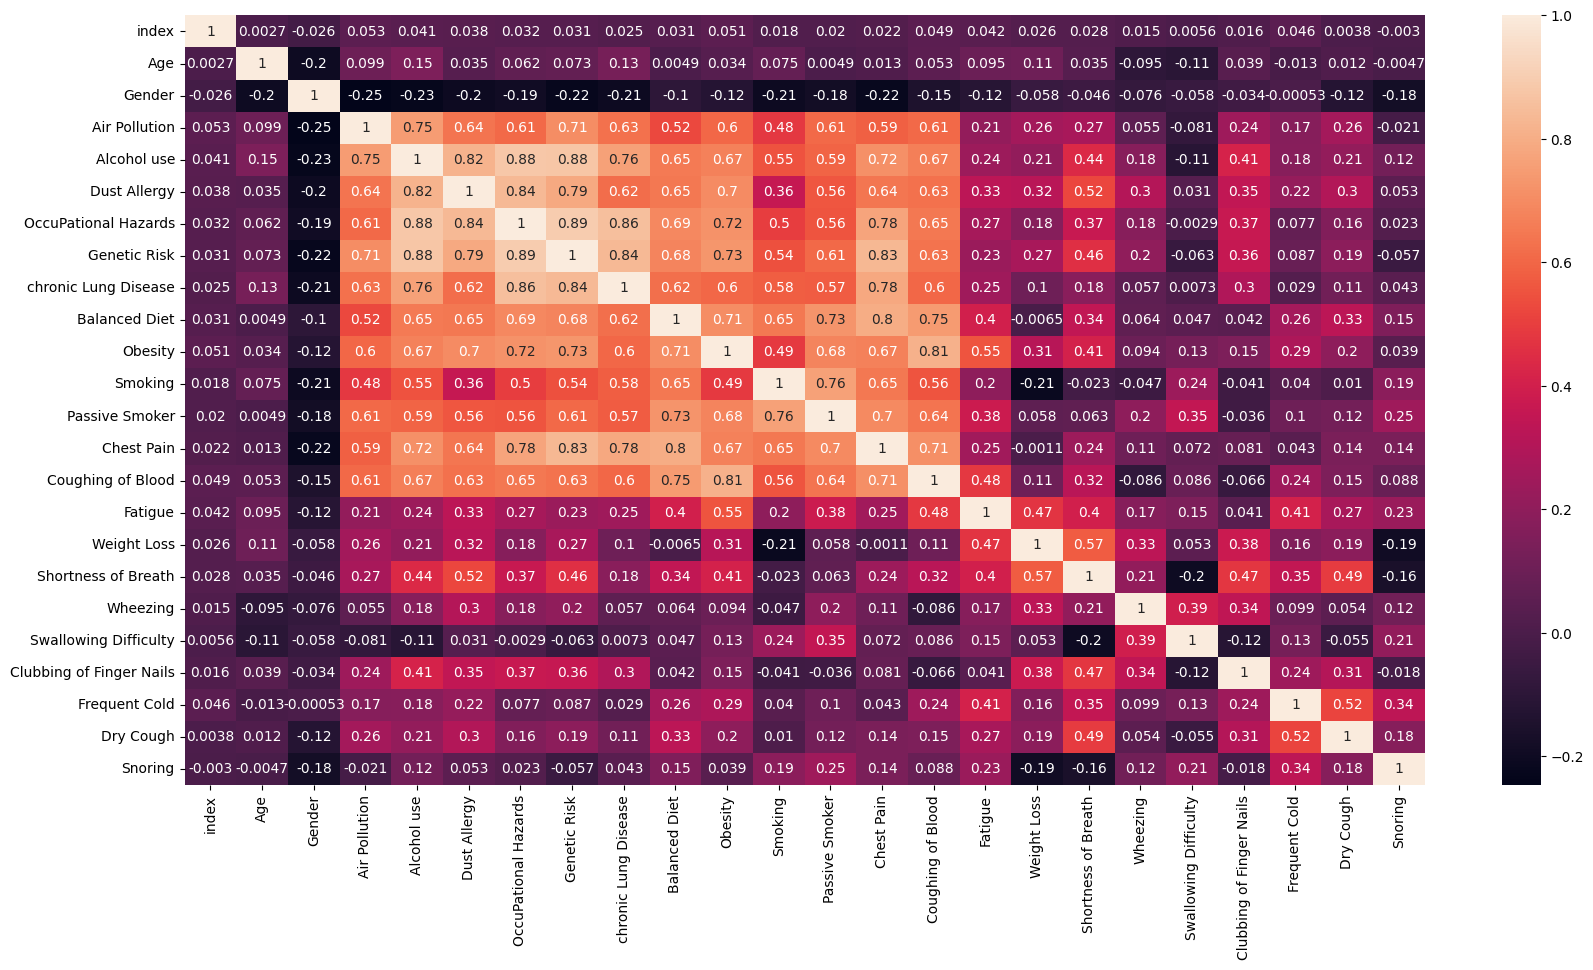

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);
plt.show()

In [14]:
sns.pairplot(df)

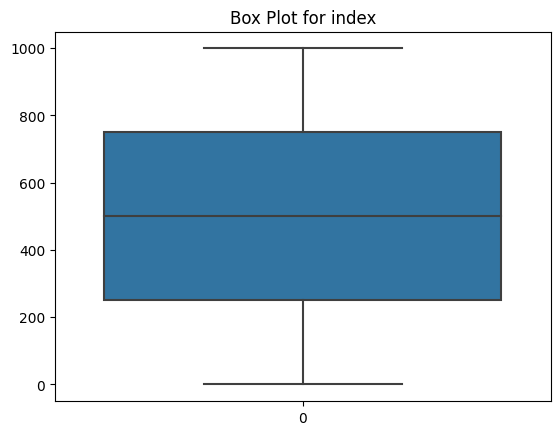

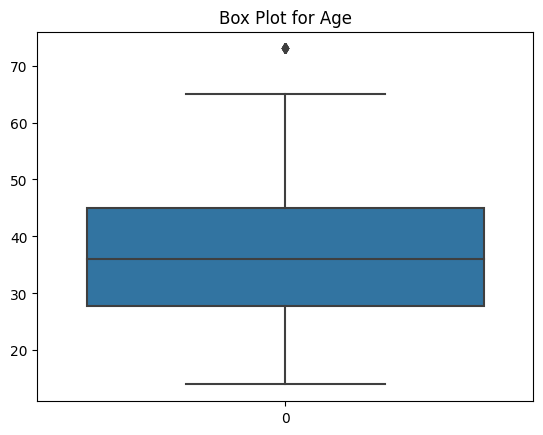

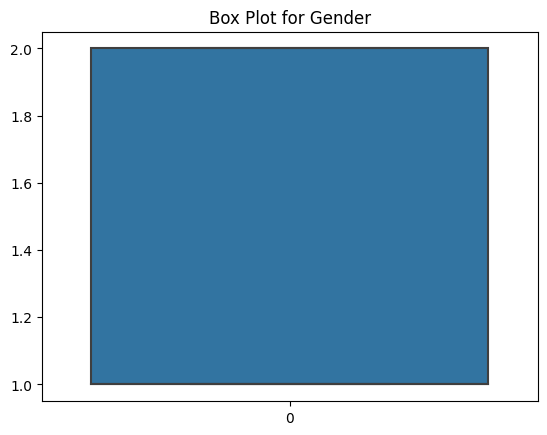

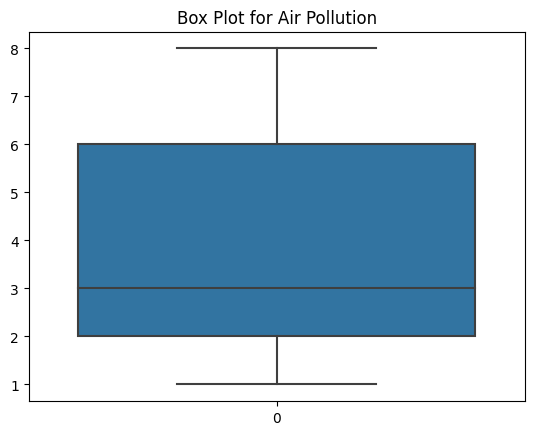

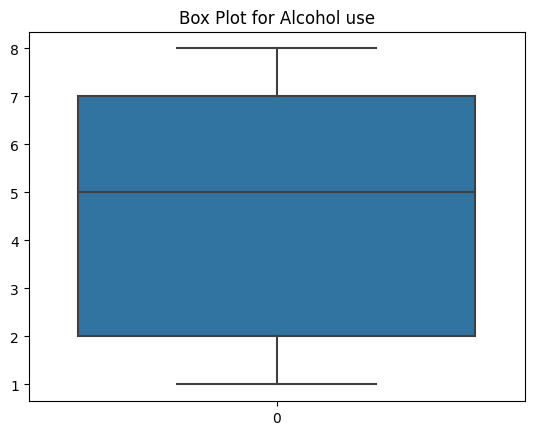

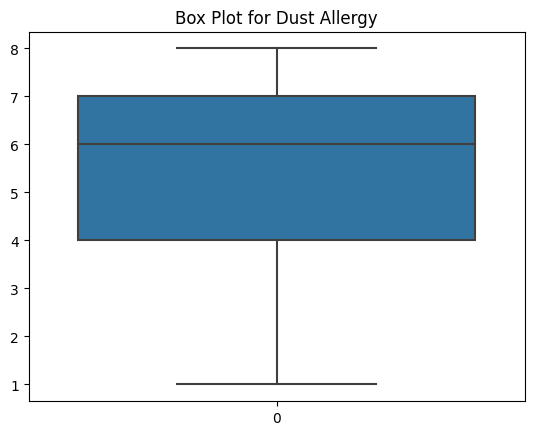

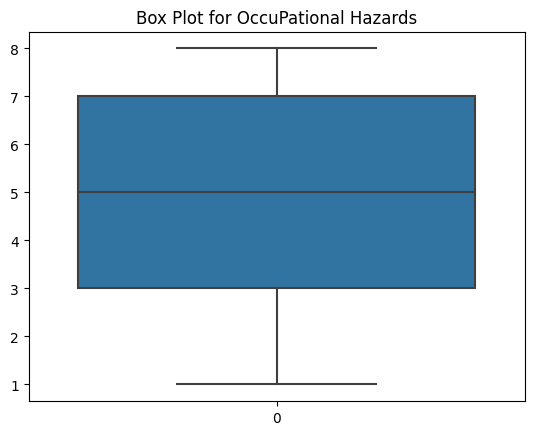

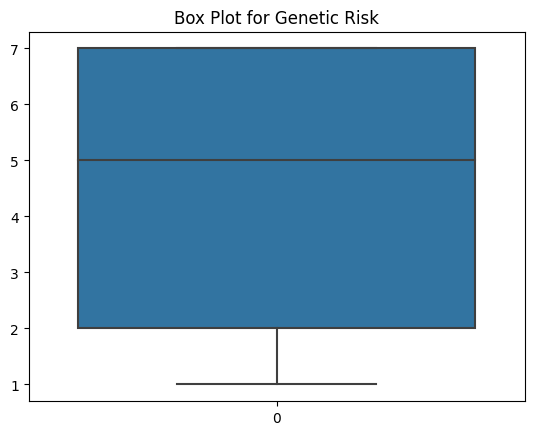

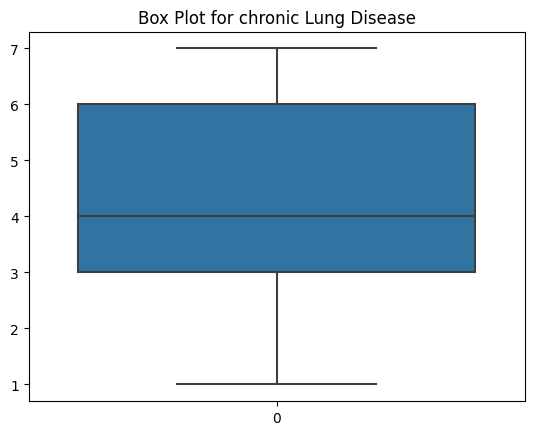

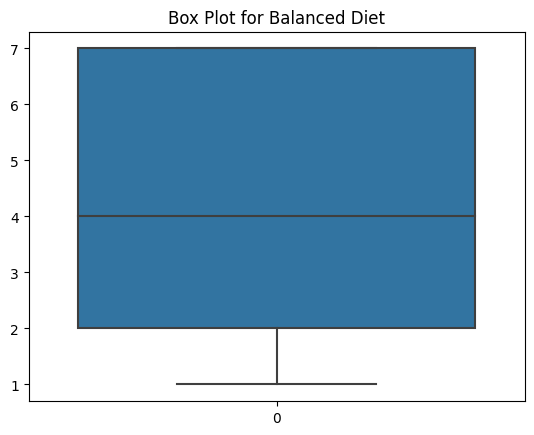

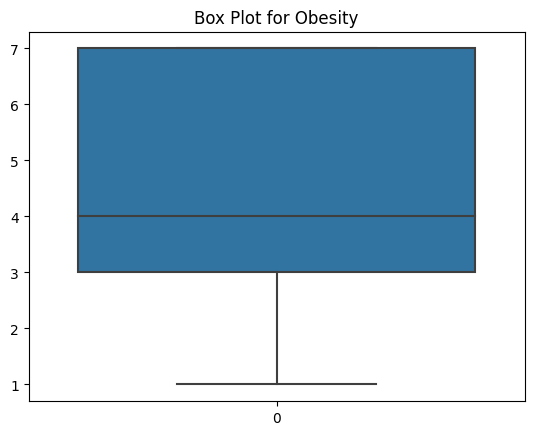

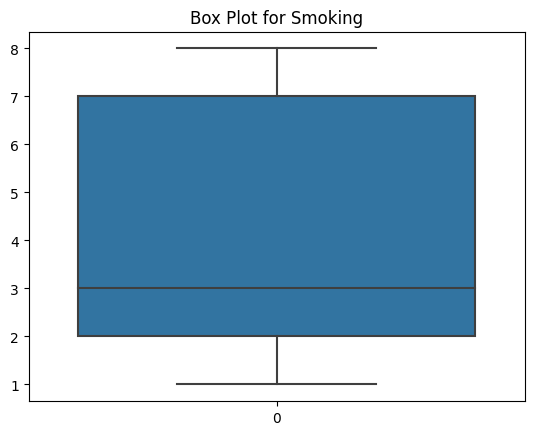

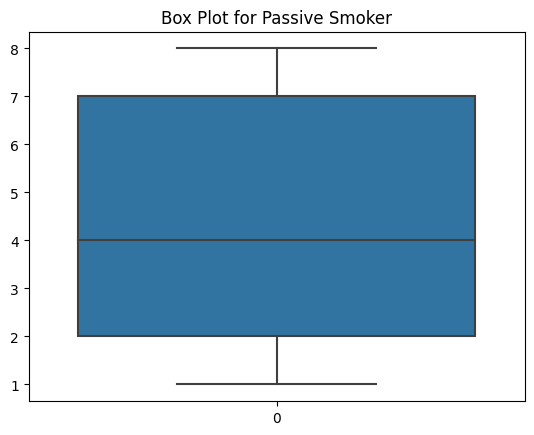

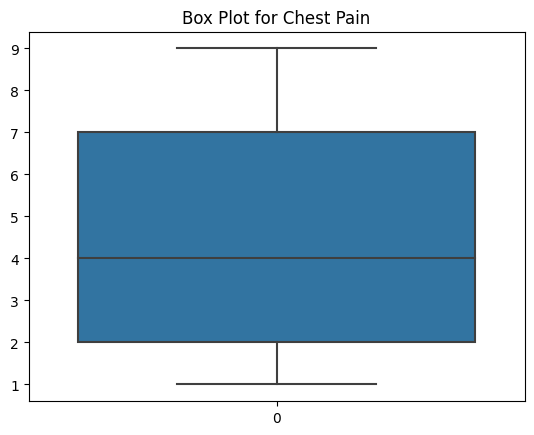

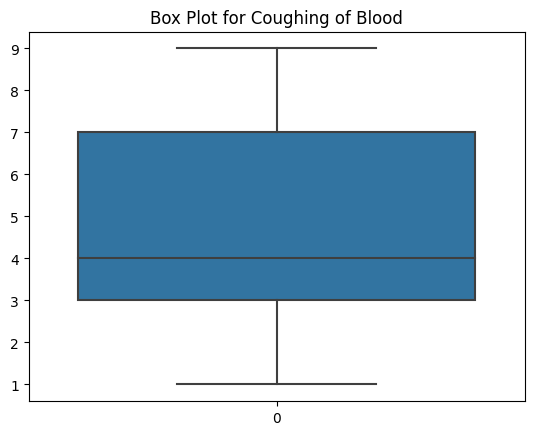

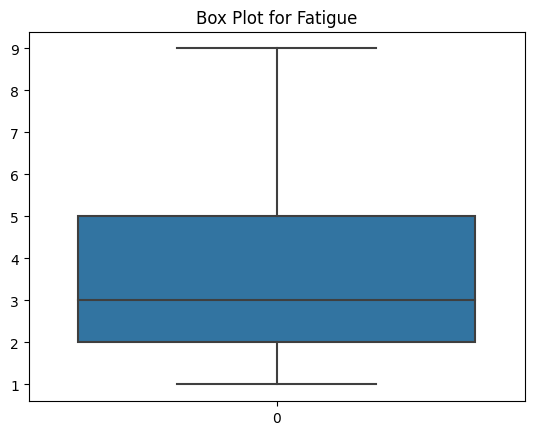

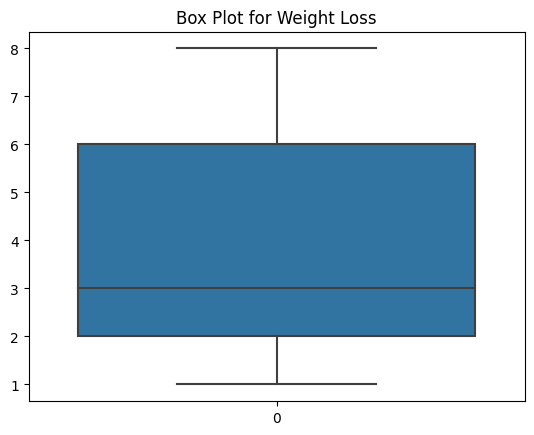

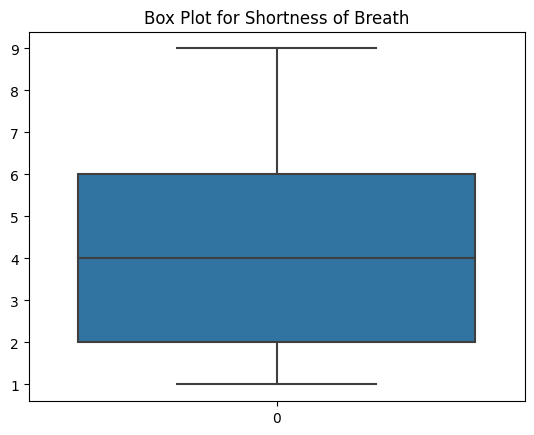

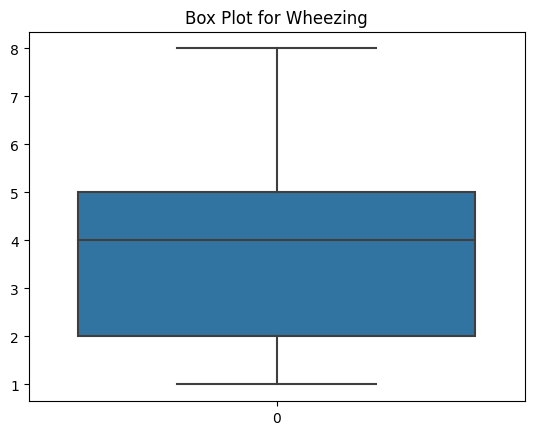

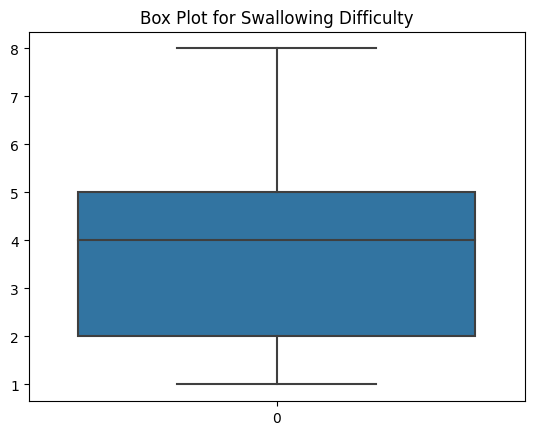

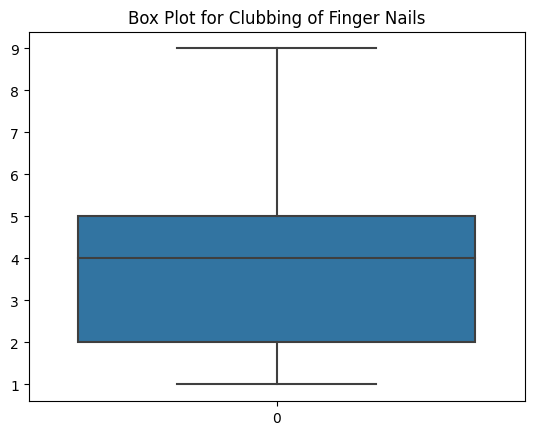

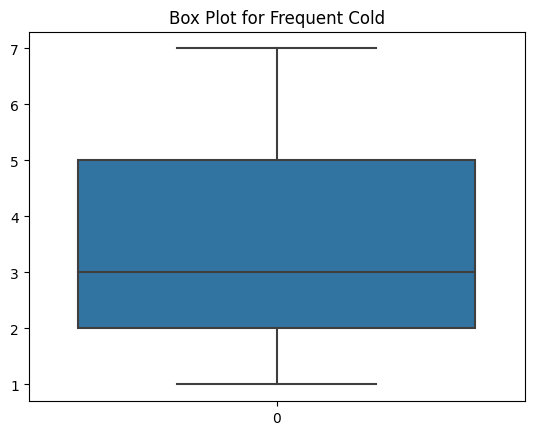

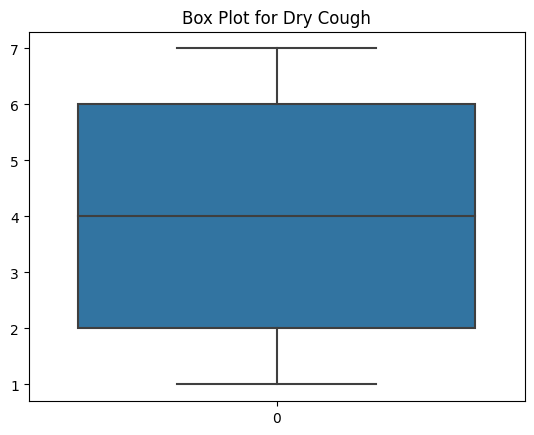

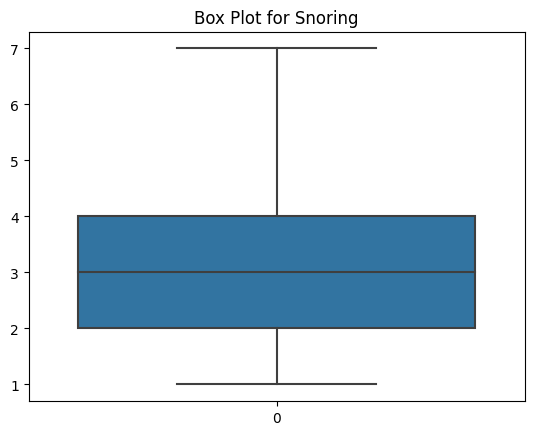

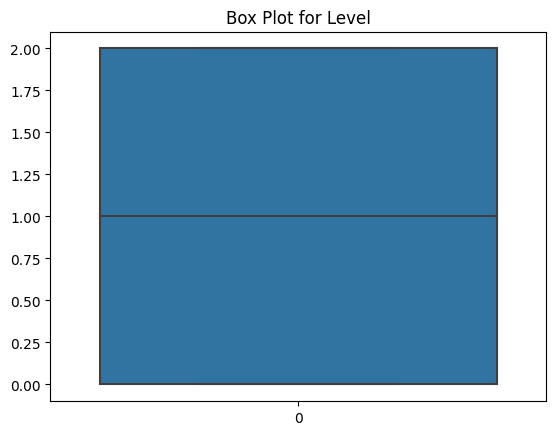

In [ ]:
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [7]:
overall_min=df.min()
print(overall_min)


index                        0
Age                         14
Gender                       1
Air Pollution                1
Alcohol use                  1
Dust Allergy                 1
OccuPational Hazards         1
Genetic Risk                 1
chronic Lung Disease         1
Balanced Diet                1
Obesity                      1
Smoking                      1
Passive Smoker               1
Chest Pain                   1
Coughing of Blood            1
Fatigue                      1
Weight Loss                  1
Shortness of Breath          1
Wheezing                     1
Swallowing Difficulty        1
Clubbing of Finger Nails     1
Frequent Cold                1
Dry Cough                    1
Snoring                      1
Level                        0
dtype: object


In [8]:
overall_max=df.max()
print(overall_max)

index                       999
Age                          73
Gender                        2
Air Pollution                 8
Alcohol use                   8
Dust Allergy                  8
OccuPational Hazards          8
Genetic Risk                  7
chronic Lung Disease          7
Balanced Diet                 7
Obesity                       7
Smoking                       8
Passive Smoker                8
Chest Pain                    9
Coughing of Blood             9
Fatigue                       9
Weight Loss                   8
Shortness of Breath           9
Wheezing                      8
Swallowing Difficulty         8
Clubbing of Finger Nails      9
Frequent Cold                 7
Dry Cough                     7
Snoring                       7
Level                         2
dtype: object


In [9]:
age_min=min(df['Age'])
print(age_min)

14


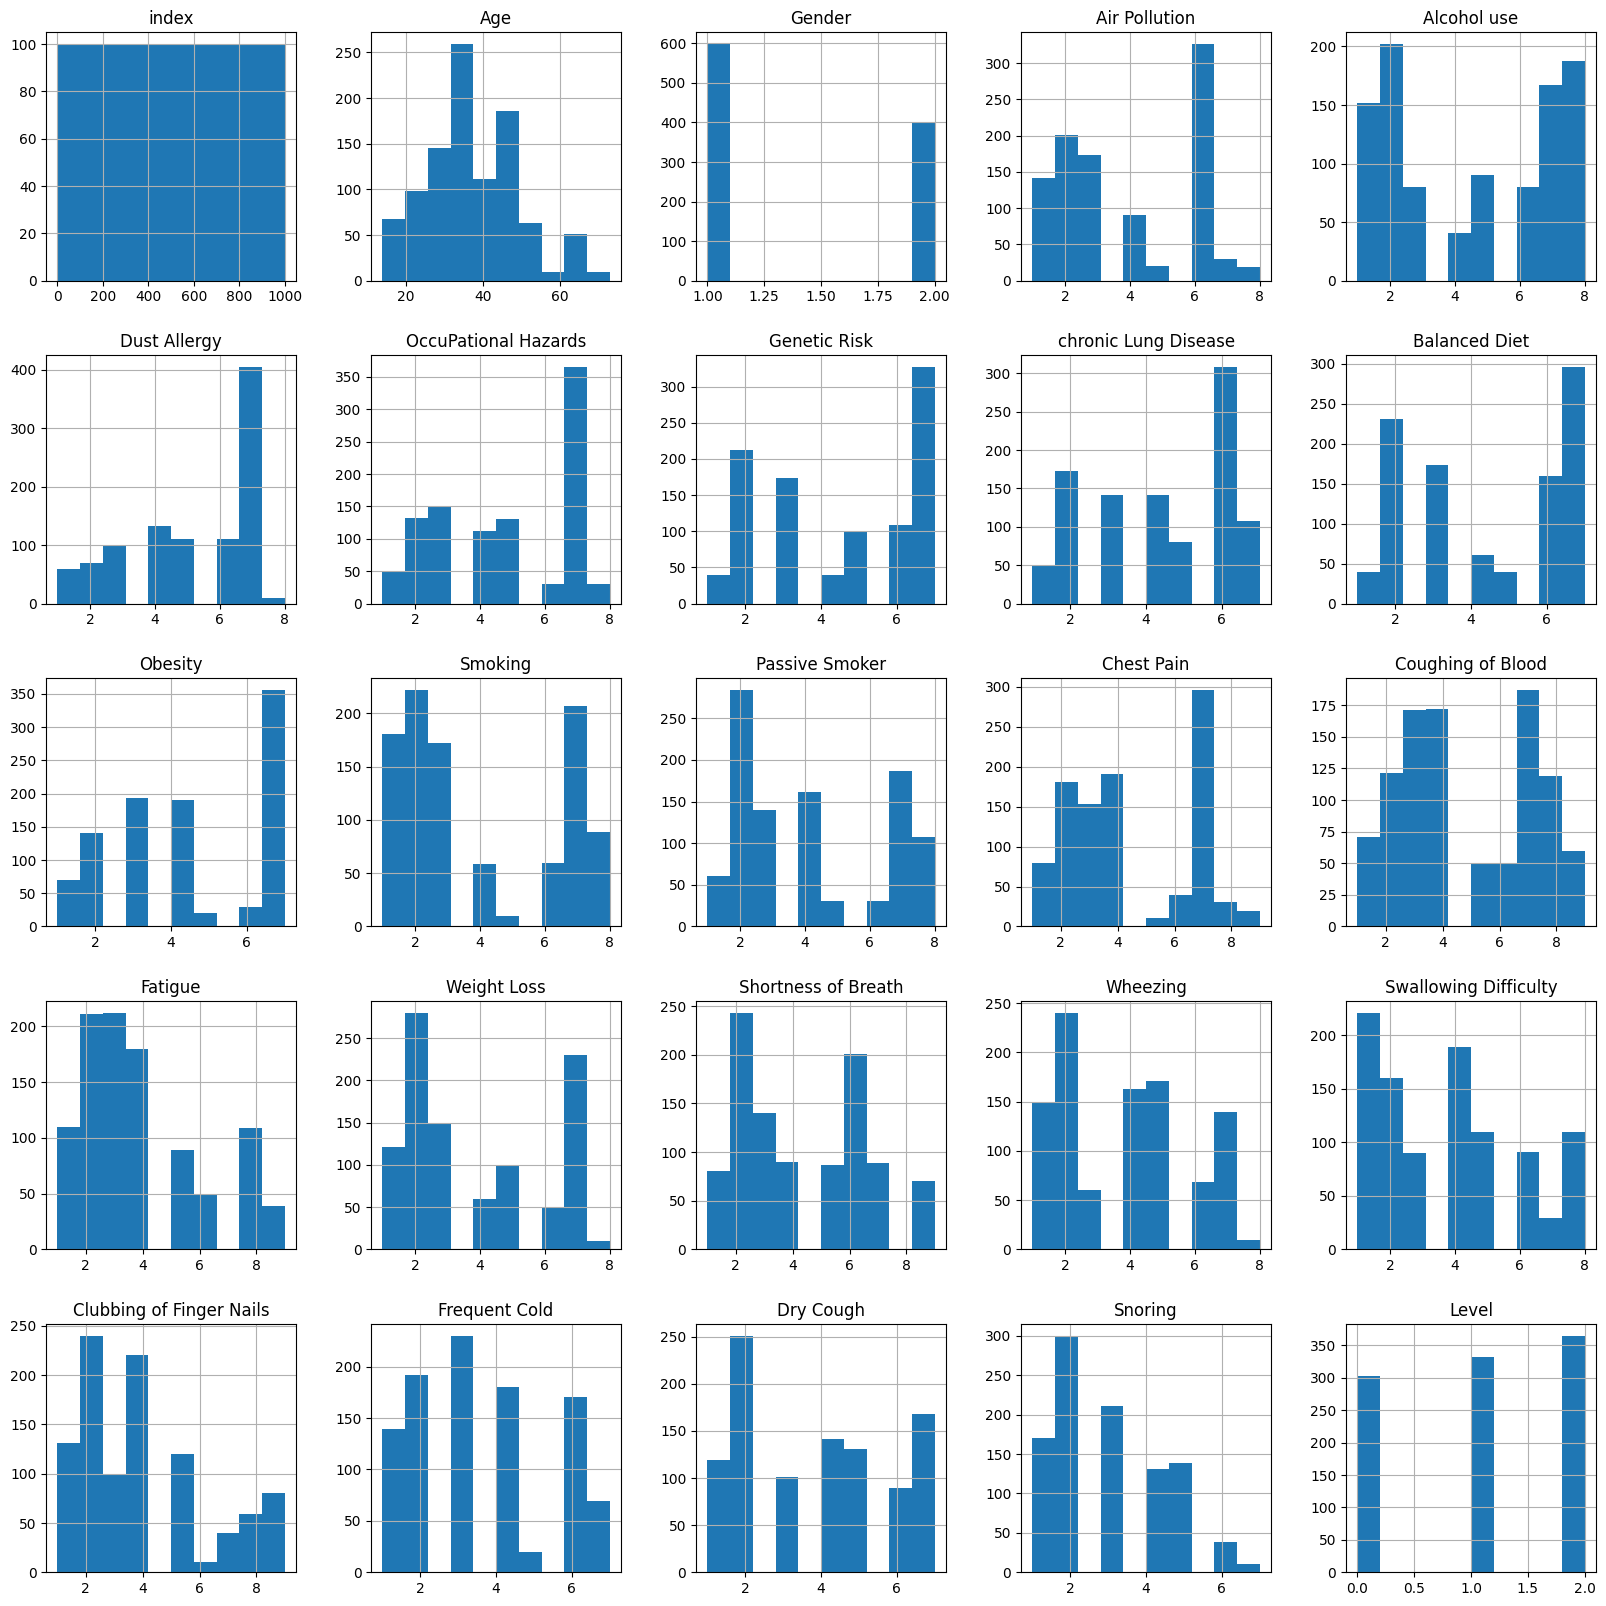

In [ ]:
# Selecting columns with data type as 'object'
columns = df.columns[df.dtypes.eq('object')]

# Convert to numeric values
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

df.hist(figsize = (20,20));
#OR
#df.hist(figsize = (50,40),color = 'green',edgecolor = 'black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


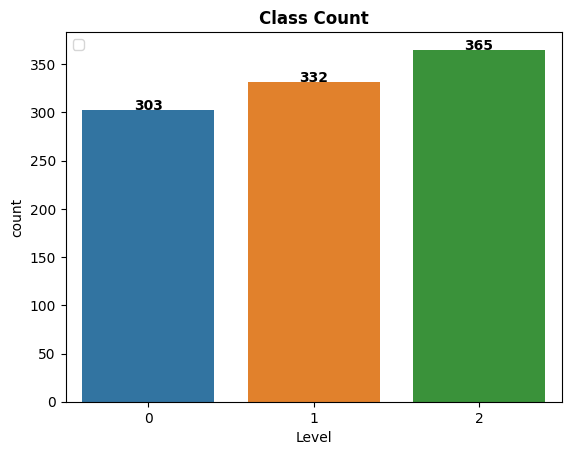

In [ ]:
total = float(df.shape[0])
ploting = sns.countplot(x='Level', data=df)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2,
           height,
           '{:.0f}'.format((height)),
           ha='center',fontweight='bold')
plt.title('Class Count', fontweight='bold')
plt.legend()
#plt.legend(prop={'weight':'bold'})
plt.show()

<AxesSubplot: >

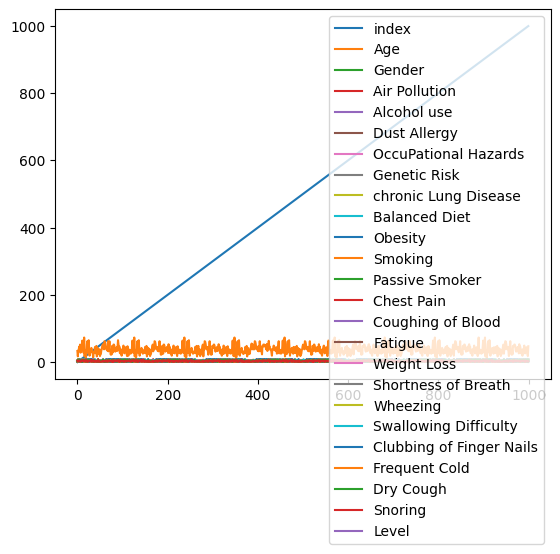

In [ ]:
df['Level'] = df['Level'].map({'Low':0,'Medium':1,'High':2})
df.plot()

In [ ]:
#feature selection

In [17]:

#Train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

selector=SelectKBest(f_classif, k=9)
selector.fit(X,Y)
X_train = selector.transform(x_train)
print("Num Features before:", x_train.shape[1])
print("Num Features after:", X_train.shape[1])
####
#selector=SelectKBest(f_classif,k=13)
#selector.fit(X,Y)
mask= selector.get_support()

feature_names= X.columns[mask]
print("Selected Features",feature_names)

Num Features before: 24
Num Features after: 9
Selected Features Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Coughing of Blood'],
      dtype='object')


In [ ]:
#CLASS IMBALANCE HANDLING

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


After Counter({'0': 365, '1': 365, '2': 365})


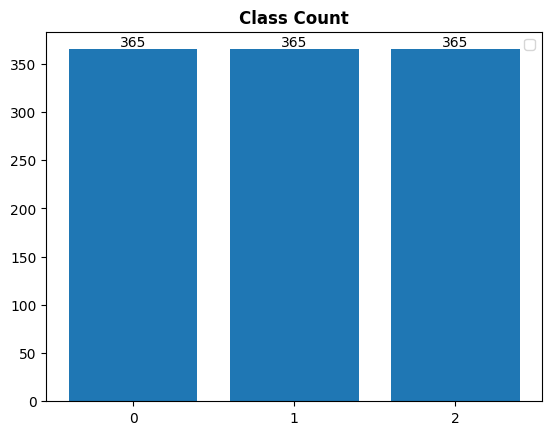

In [12]:
## plot the distribution

#print('Class distribution after oversampling:', pd.Series(y_resampled).value_counts())
counter = Counter(y_resampled)
print('After',counter)
pyplot.bar(counter.keys(), counter.values())
for x,y in counter.items():
    pyplot.annotate(str(y),(x,y), ha= 'center', va='bottom')
plt.title('Class Count', fontweight='bold')
plt.legend()
#plt.legend(prop={'weight':'bold'})
plt.show()

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
# creating the model

clf1= LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,   bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf3=SVC()
#Voting ensemble
model = VotingClassifier(estimators=[('lr', clf1),('rf', clf2),('svc',clf3)], voting='hard')
cv=KFold(n_splits=10, shuffle=True)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
scores=cross_val_score(model,selector.fit_transform(X,Y),Y,cv=cv)
# report performance
def print_report(scores, x_train, x_test, y_train, y_test):
    print("\n\nValidation Report:\n------------------")
    print(classification_report(y_test,scores.predict(x_test)))
print_report(model, x_train, x_test, y_train, y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.0s finished
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.



Validation Report:
------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.97      0.98        63
           2       0.99      1.00      0.99        82

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



<Figure size 1200x1200 with 0 Axes>

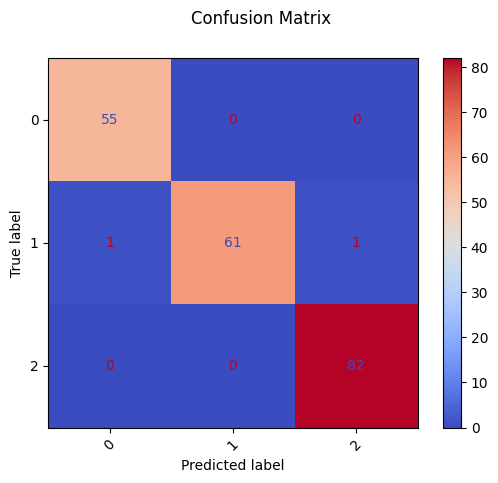

[[55  0  0]
 [ 1 61  1]
 [ 0  0 82]]


0.99

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()
print(cm)
acc_scale = accuracy_score(y_test,y_pred)
acc_scale